In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
mnist = keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

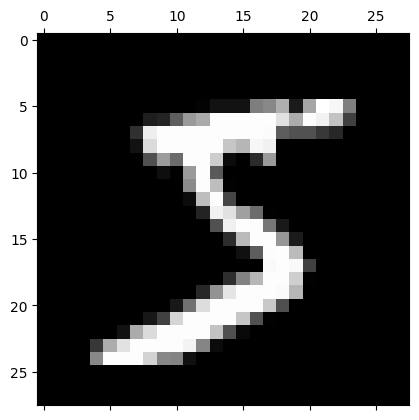

In [10]:
img = x_train[0]
plt.matshow(img)
plt.gray()

In [11]:
np.min(img), np.max(img)

(0, 255)

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [18]:
model.build(input_shape=(None, 28, 28))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
hist = model.fit(x_train, y_train, epochs=50, batch_size=256,validation_data=(x_test,y_test))

2024-05-28 21:55:04.782509: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/50
223/235 [===========================>..] - ETA: 0s - loss: 0.4154 - accuracy: 0.8837

2024-05-28 21:55:08.232224: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


235/235 [==============================] - 3s 5ms/step - loss: 0.4051 - accuracy: 0.8867 - val_loss: 0.1967 - val_accuracy: 0.9451
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1557 - accuracy: 0.9552 - val_loss: 0.1278 - val_accuracy: 0.9620
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1092 - accuracy: 0.9678 - val_loss: 0.1064 - val_accuracy: 0.9675
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0819 - accuracy: 0.9757 - val_loss: 0.0882 - val_accuracy: 0.9722
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0858 - val_accuracy: 0.9742
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0541 - accuracy: 0.9840 - val_loss: 0.0820 - val_accuracy: 0.9742
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0439 - accuracy: 0.9871 - val_loss: 0.0780 - val_accuracy: 0.9772
Epoch 8/50
235/23

In [22]:
model.evaluate(x_test, y_test)

 74/313 [======>.......................] - ETA: 0s - loss: 0.1769 - accuracy: 0.9734

2024-05-28 21:56:34.001294: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.9823


[0.11560583859682083, 0.9822999835014343]

In [23]:
img = x_test[100]
print(y_test[100])

6


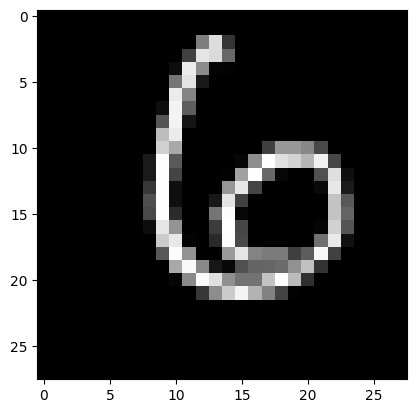

In [24]:
plt.imshow(img)
plt.gray()

In [26]:
model.predict(np.reshape(img,(-1, 784)))

1/1 [==============================] - 0s 62ms/step


array([[1.6252803e-10, 2.9710653e-15, 8.3328967e-14, 6.0827212e-19,
        1.9409582e-14, 1.2604415e-12, 1.0000000e+00, 3.2769997e-14,
        1.7629053e-15, 1.3759483e-19]], dtype=float32)

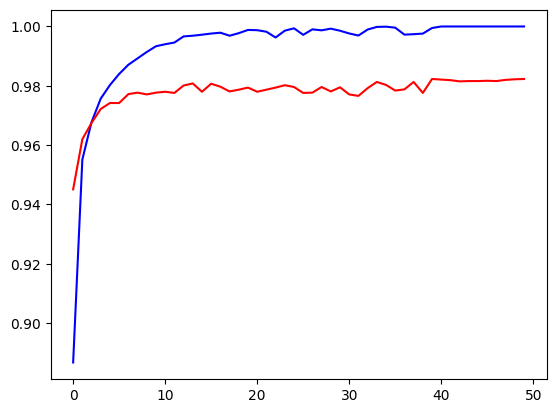

In [27]:
acc = hist.history['accuracy']
vall_acc = hist.history['val_accuracy']

plt.plot(acc, color='blue')
plt.plot(vall_acc, color='red')